In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Example of Binomial Distribution
#### Fashion Trends Online (FTO) is an e-commerce company that sells women apparel. It is observed that 10% of their customers return the items purchased by them for many reasons (such as size, color, and material mismatch). On a specific day, 20 customers purchased items from FTO. 
Calculate:<br>1.   Probability that exactly 5 customers will return the items.<br>2.   Probability that a maximum of 5 customers will return the items.<br>3.   Probability that more than 5 customers will return the items purchased by them.<br>4.   Average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.

#### Probability that exactly 5 customers will return the items.
The function stats.binom.pmf() calculates PMF for binomial distribution and takes three parameters:<br>(a)  Expected number of successful trials (5) <br>(b)  Total number of trials (20)<br>(c)  The probability of success (0.1)

In [4]:
stats.binom.pmf(5,20,0.1)
## stats.binom.pmf(x,n,p)

0.03192136111995428

The corresponding probability is 0.03192, that is, the probability that exactly 5 customers will return the items is approximately 3%. 

In [9]:
pmf_df = pd.DataFrame({ 'success': range(0,21),
    'pmf' : list(stats.binom.pmf(range(0,21),20,0.1))
})

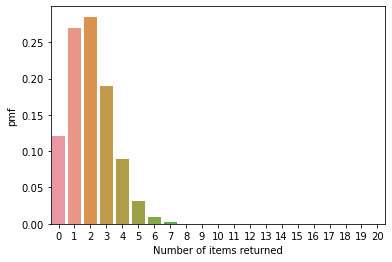

In [16]:
# Creating a bar plot with number of success as x and pmf as y
sns.barplot(x= pmf_df.success, y = pmf_df.pmf)
plt.ylabel('pmf')
plt.xlabel("Number of items returned");

### fig: Binomial Distribution

### 2. Probability that a maximum of 5 customers will return the items.
The class <b>stats.binom.cdf()</b> computes the CDF for binomial distribution. In this case the cumulative dis-tribution function returns the probability that a maximum of 5 customers will return items.

In [19]:
stats.binom.cdf(5,20,0.1)
#P(x<=X)= stats.binom.cdf(x,n,p)
#The corresponding probability value is 0.9887.

0.988746865835491

### 3. Probability that more than 5 customers will return the items purchased by them.
Total probability of any number of customers returning items (including 0) is always equal to 1.0. So, the probability that more than 5 customers will return the items can be computed by subtracting the probability of a maximum of 5 customers will return items from 1.0. In other words, the probability that more than 5 customers will return the items can be obtained by computing CDF of 5 and then subtracting it from 1.0. 

In [21]:
1-stats.binom.cdf(5,20,0.1)

0.011253134164509015

### 4.     Average  number  of  customers  who  are  likely  to  return  the  items  and  the  variance  and  the  standard deviation of the number of returns. 
(a)  Average of a binomial distribution is given by n * p<br>(b)  Variance of the binomial distribution is given by n * p * (1 − p)

In [23]:
mean,var = stats.binom.stats(20,0.1)
print(f'mean: {mean} and variance :{var}')

mean: 2.0 and variance :1.8


## Poission Distribution

### Example of Poisson Distribution
The number of calls arriving at a call center follows a Poisson distribution at 10 calls per hour. <br>1.   Calculate the probability that the number of calls will be maximum 5.<br>2.   Calculate the probability that the number of calls over a 3-hour period will exceed 30.

### 1. Calculate the probability that a maximum of 5 calls will arrive at the call center.
As the number of calls arriving at the center follows Poisson distribution, we can use stats.poisson.cdf to calculate the probability value. It takes the following two parameters:<br>(a)  First parameter: Number of events (in this case, 5 calls) for which the probability needs to be calculated.<br>(b)  Second parameter: The average numbers of events (i.e., 10 calls per hour).

In [25]:
stats.poisson.cdf(5,10)
#stats.poisson.pdf(x,n)
#The corresponding probability is 0.067.

0.06708596287903189

### 2. Calculate the probability that the number of calls over a 3-hour period will exceed 30.
Since the average calls per hour is 10 (l = 10), and we are interested in finding the calls over 3 hours, the mean number of calls over 3 hours is lt = 30. Probability that the number of calls will be more than 30 is given by

In [26]:
1-stats.poisson.cdf(30,30)

0.45164848742208863

In [30]:
pmf_df1 = pd.DataFrame({ 'success': range(0,30),
    'pmf' : list(stats.poisson.pmf(range(0,30),10))
})

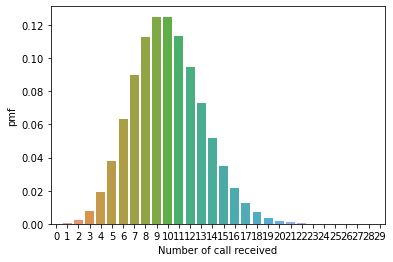

In [31]:
# Creating a bar plot with number of success as x and pmf as y
sns.barplot(x= pmf_df1.success, y = pmf_df1.pmf)
plt.ylabel('pmf')
plt.xlabel("Number of call received");

### fig: poisson distribution

##   EXPONENTIAL DISTRIBUTION

## Example of Exponential Distribution
The time-to-failure of an avionic system follows an exponential distribution with a mean time between failures (MTBF) of 1000 hours. Calculate<br>1.   The probability that the system will fail before 1000 hours.<br>2.   The probability that it will not fail up to 2000 hours.<br>3.   The time by which 10% of the system will fail (i.e., calculate P10 life).<br>We solve each of these as follows: Since time-to-failure is 1000 hours, so l is 1/1000.

#### 1.Calculate the probability that the system will fail before 1000 hours. 

In [3]:
# stats.expon.cdf(x,mean,scale of exponential distribution)
stats.expon.cdf(1000,loc =1/1000,scale = 1000)
# the corresponding probability value is 0.6321

0.6321201909489326

#### 2.Calculate the probability that it will not fail up to 2000 hours. 

In [5]:
1-stats.expon.cdf(2000,loc=1/1000,scale =1000)
#the corresponding probability value is 0.1353

0.13533541857196352

#### 3. Calculate the time by which 10% of the system will fail (i.e., calculate P10 life).<br> 
This can be calculated by ppf (percent point function) and is an inverse of CDF. stats.expon.ppf takes the percent point value and the mean and scale of the exponential distribution.

In [8]:
stats.expon.ppf(0.1,loc=1/1000,scale=1000)
# That is, by 105.36 hours, 10% of systems will fail.

105.36151565782632

In [12]:
pdf_df_exp = pd.DataFrame({
    'success' : range(0,5000,100),
    'pdf': list(stats.expon.pdf(range(0,5000,100),loc=1/1000,scale = 1000))
})

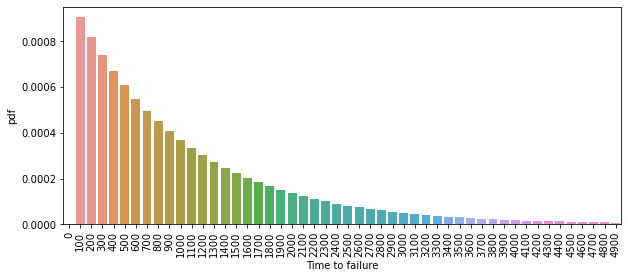

In [21]:

plt.figure(figsize=(10,4))
sns.barplot(x= pdf_df_exp.success,y=pdf_df_exp.pdf)
plt.xticks(rotation=90) ## for rotaion of levels in x axis
plt.xlabel('Time to failure');

## NOrmal Distribution
#### Example of Normal Distribution
To understand normal distribution and its application, we will use daily returns of stocks traded in BSE (Bombay  Stock  Exchange).  Imagine  a  scenario  where  an  investor  wants  to  understand  the  risks  and  returns associated with various stocks before investing in them. For this analysis, we will evaluate two stocks: BEML and GLAXO. The daily trading data (open and close price) for each stock is taken for the period starting from 2010 to 2016 from BSE site (www.bseindia.com).


In [53]:
beml_df = pd.read_csv('./data/BEML.csv')
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [54]:
glaxo_df = pd.read_csv('./data/GLAXO .csv')
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


Our discussion will involve only close price. The daily returns of   a  stock are calculated as the change in close prices with respect to the close price of yesterday.<br>Since our analysis will involve only daily close prices, so we will select Date and Close columns from the DataFrames.

In [55]:
beml_df = beml_df[['Date','Close']]
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))
beml_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [56]:
glaxo_df = glaxo_df[['Date','Close']]
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
glaxo_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


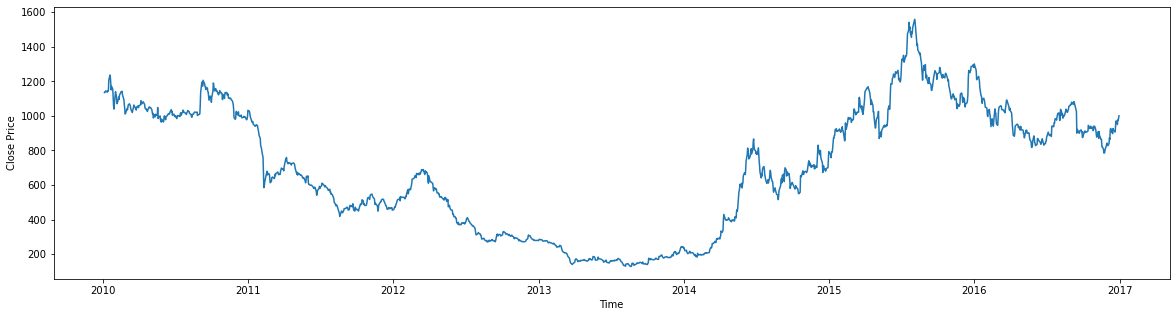

In [57]:
plt.figure(figsize=(20,5))
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price');

#### fig:Close price trend of BEML

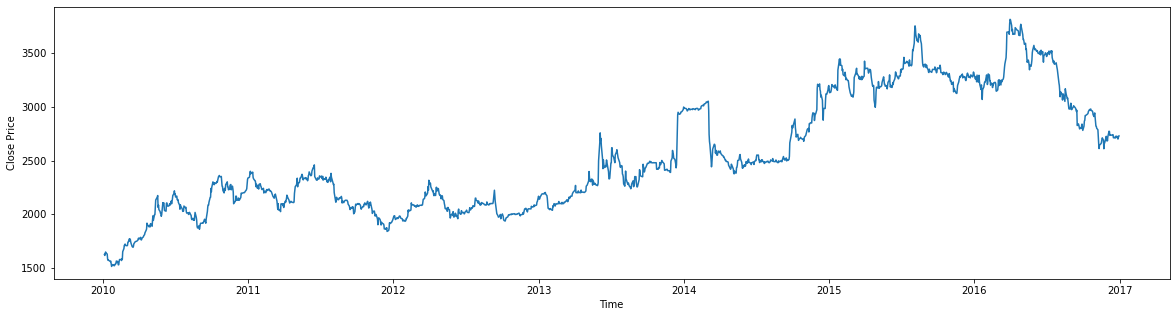

In [58]:
plt.figure(figsize=(20,5))
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price');

#### fig: Close PRice trend of BEML

1.   What is the expected daily rate of return of these stocks?<br>2.   Which stocks have higher risk or volatility as far as daily returns are concerned?<br>3.   What is the expected range of return for 95% confidence interval?Chapter<br>4.   Which stock has higher probability of making a daily return of 2% or more?<br>5.   Which stock has higher probability of making a loss (risk) of 2% or more?

11The  method  <b>pct_change()</b> in  Pandas  will  give  the  percentage  change  in  a  column  value  shifted  by  a  period, which is passed as a parameter to periods. periods = 1 indicates the value change since last row, that is, the previous day.

In [59]:
beml_df['Gain'] = beml_df.Close.pct_change(periods= 1)
beml_df.head()

,Date,Close,Gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087


In [60]:
glaxo_df['Gain']= glaxo_df.Close.pct_change(periods =1)
glaxo_df.head()

,Date,Close,Gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [61]:
beml_df= beml_df.dropna()
glaxo_df = glaxo_df.dropna()

In [62]:
beml_df.head()

,Date,Close,Gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162


In [63]:
glaxo_df.head()

,Date,Close,Gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


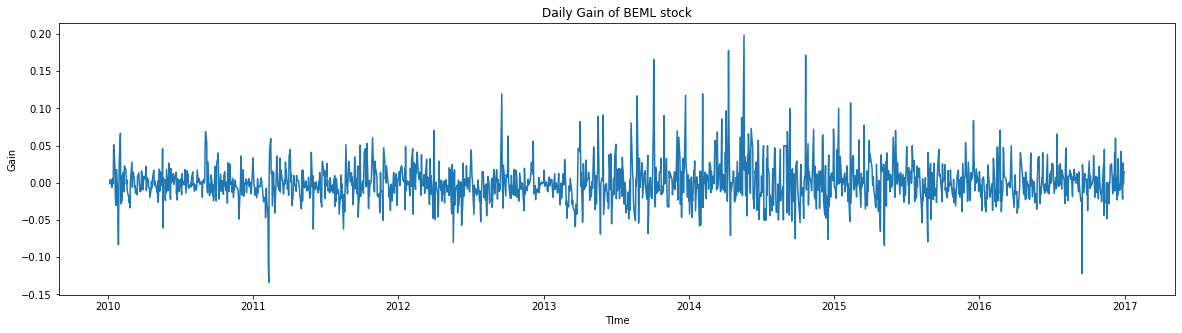

In [68]:
plt.figure(figsize=(20,5))
plt.plot(beml_df.index,beml_df.Gain)
plt.xlabel('TIme')
plt.ylabel('Gain')
plt.title("Daily Gain of BEML stock");

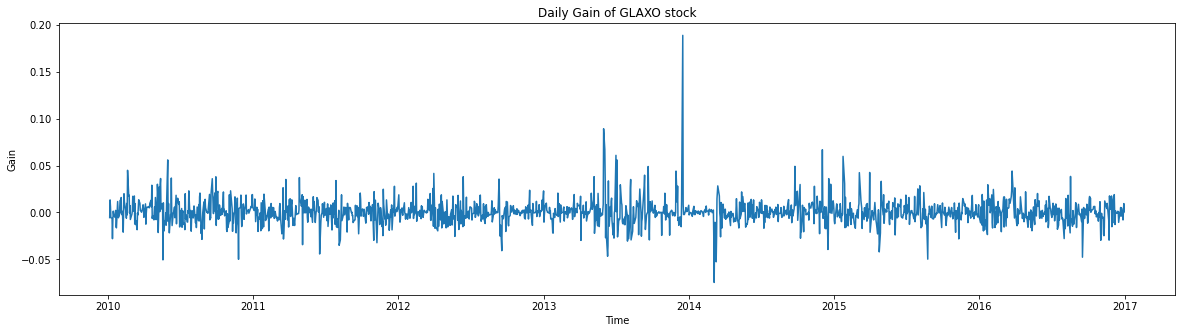

In [67]:
plt.figure(figsize=(20,5))
plt.plot(glaxo_df.index,glaxo_df.Gain)
plt.xlabel('Time')
plt.ylabel('Gain')
plt.title('Daily Gain of GLAXO stock');

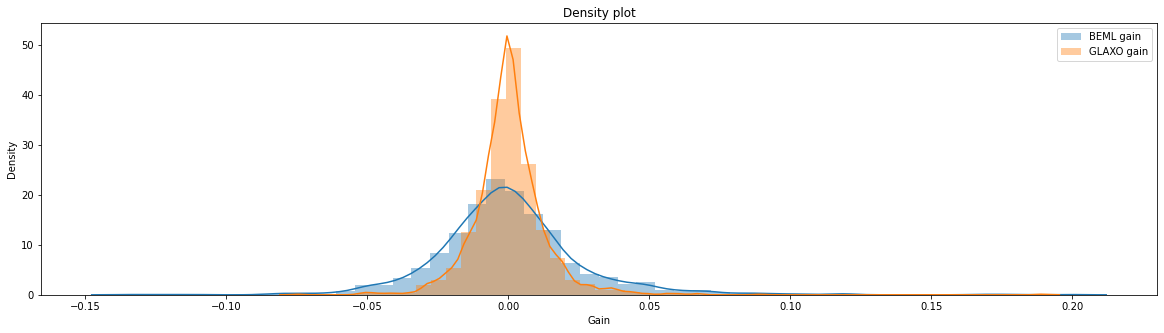

In [70]:
plt.figure(figsize=(20,5))
sns.distplot(beml_df.Gain,label='BEML gain')
sns.distplot(glaxo_df.Gain,label='GLAXO gain')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.title("Density plot")
plt.legend();